[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
sentence 0 hi since recruiter lead permission approve requisitions makes please make thanks recruiter


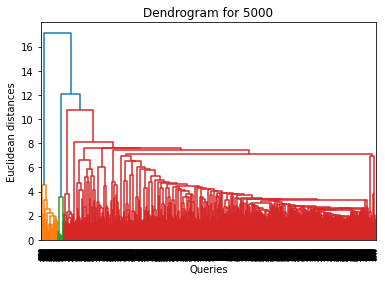

In [1]:
import collections
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


nltk.download('stopwords')


def fn_tokenizer(text):
#     if len(text.split()) > 3:
#         print("Text", text)
    tokens = word_tokenize(text)
#     if len(tokens) > 3:
#         print("Tokens", tokens)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(t) for t in tokens if t not in stopwords.words('english')]
#     if len(tokens) > 2:
#         print("after stemming", len(tokens), tokens)
    return tokens

wcss = []
 
def cluster_sentences(text, n):
    vectorizer = TfidfVectorizer(tokenizer = fn_tokenizer, stop_words = stopwords.words('english'), lowercase = True)
#     print("vectorizer", vectorizer)
    matrix = vectorizer.fit_transform(text)
#     print("matrix", type(matrix), matrix)
    return matrix
#     model = KMeans(n_clusters = n, init = 'k-means++', random_state = 42)
#     model.fit(matrix)
#     wcss.append(model.inertia_)
#     topics = collections.defaultdict(list)

#     for index, label in enumerate(model.labels_):
#         topics[label].append(index)
#     return dict(topics)

nrows = 5000

df = pd.read_csv("../input/supportticketsclassification/all_tickets.csv", usecols = ["body"], nrows = nrows)
df = df["body"]
# print(df.head())
sentences = []

for sentence in df:
    sentences.append(sentence)

    
# sentences = ["Adhithyan is a very good boy excellent student", "Abbinaya is a very good girl", "Aishwarya is a very very bad girl excellent friend"]
    
    
print("sentence 0", sentences[0])

n_clusters = nrows
X = cluster_sentences(sentences, 5)
del df
del sentences
X = X.toarray()
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram for ' + str(nrows))
plt.xlabel('Queries')
plt.ylabel('Euclidean distances')
plt.show()
# for i in range(1, n_clusters+1):
#     clusters = cluster_sentences(sentences, i)

# for cluster in range(n_clusters):
#     print("Cluster", cluster, ":")
#     for i, sentence in enumerate(clusters[cluster]):
#       print("\t Sentence", i+1, ": ", sentences[sentence])

# plt.plot(range(1, nrows+1), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

